In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq
import scipy.stats as spst
from scipy.stats import gaussian_kde
from matplotlib import cm
from pathos.threading import ThreadPool as Pool
from fitting_functions import *
import cartopy.crs as ccrs

In [2]:
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

In [3]:
# concatenate years
for i in range(len(vt_l)):
    all_x = np.array([])
    all_y = np.array([])
    all_lat = np.array([])
    all_lon = np.array([])
    for k in range(len(year_l)):
        x= np.load(f'{fol}/output/yearly_arrays/x_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        y= np.load(f'{fol}/output/yearly_arrays/y_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        lat= np.load(f'{fol}/output/yearly_arrays/lat_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        lon= np.load(f'{fol}/output/yearly_arrays/lon_{year_l[k]}_{vt_l[i]}_{th_l[i]}.npy')
        
        all_x = np.concatenate([all_x,x])
        all_y = np.concatenate([all_y,y])
        all_lat = np.concatenate([all_lat,lat])
        all_lon = np.concatenate([all_lon,lon])
        
    np.save(f'{fol}/output/all_years_arrays/x_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_x)
    np.save(f'{fol}/output/all_years_arrays/y_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_y)
    np.save(f'{fol}/output/all_years_arrays/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_lat)
    np.save(f'{fol}/output/all_years_arrays/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy',all_lon)

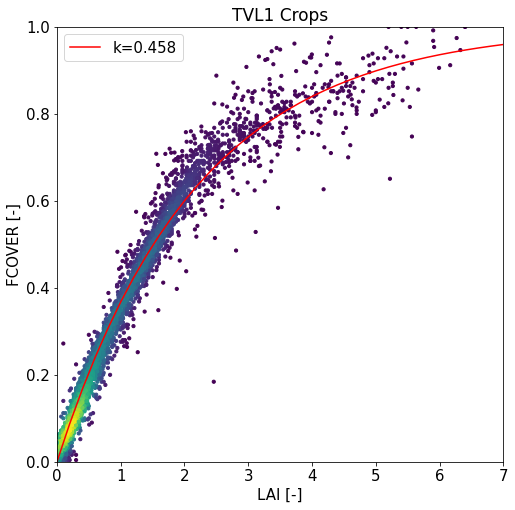

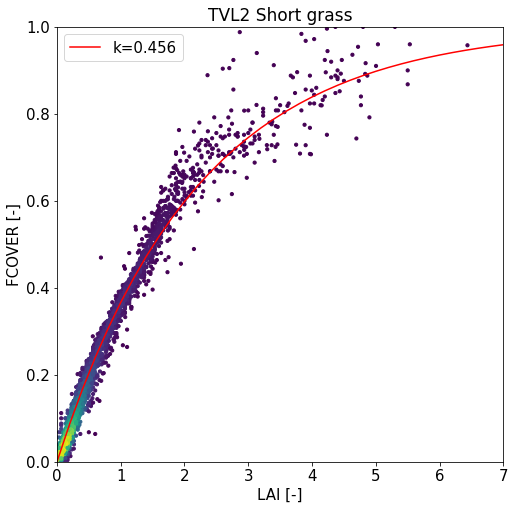

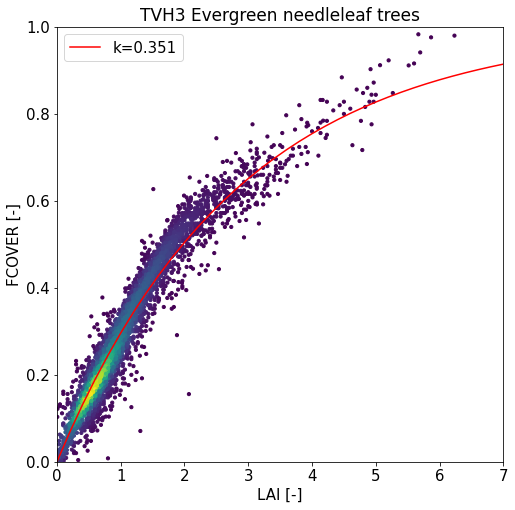

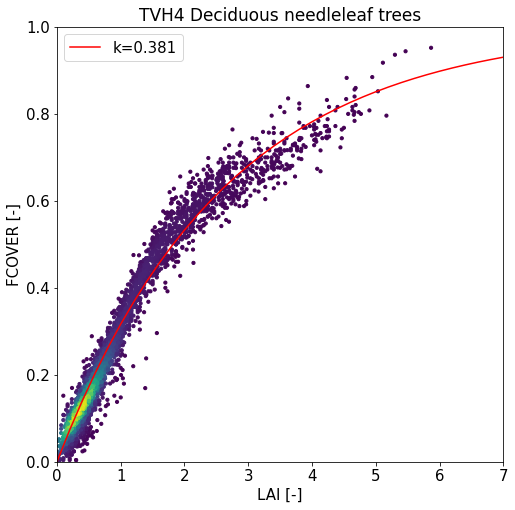

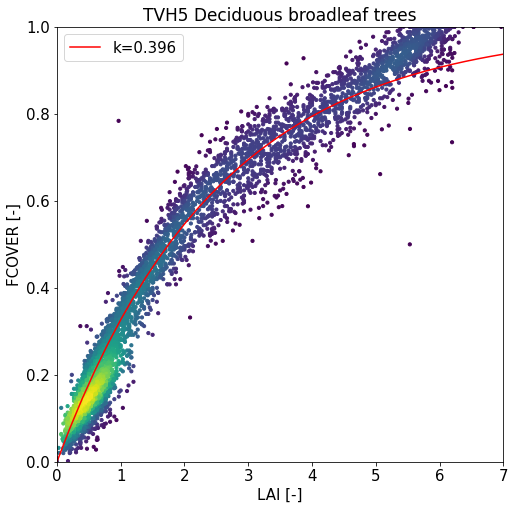

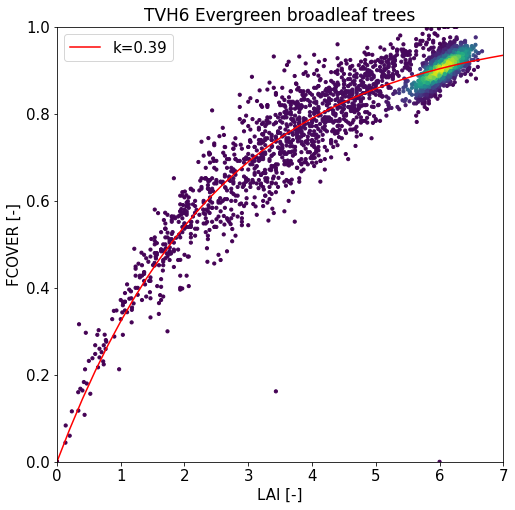

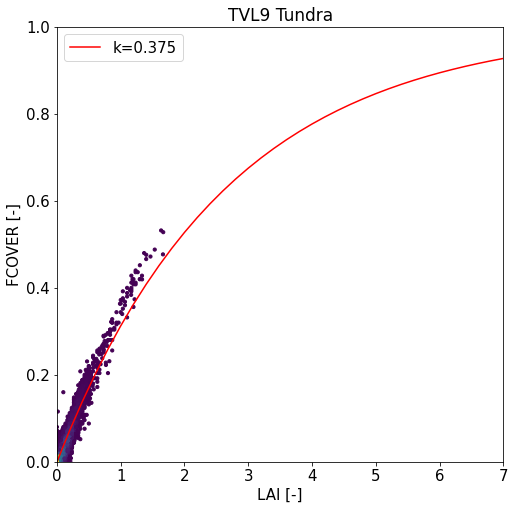

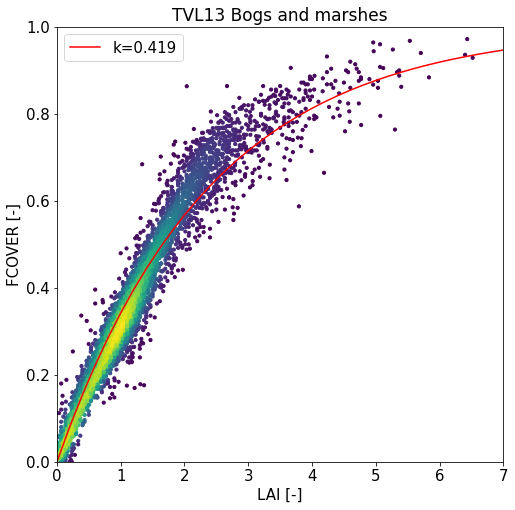

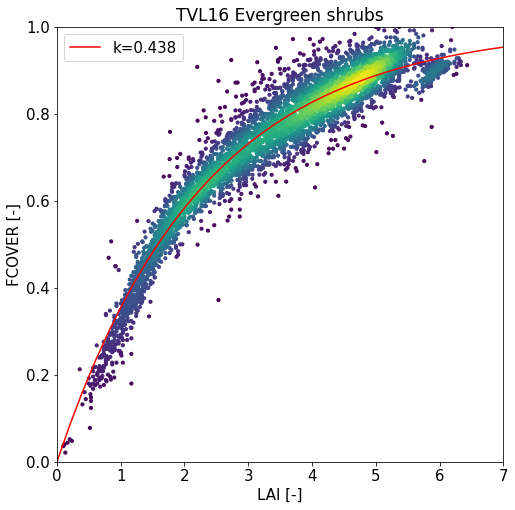

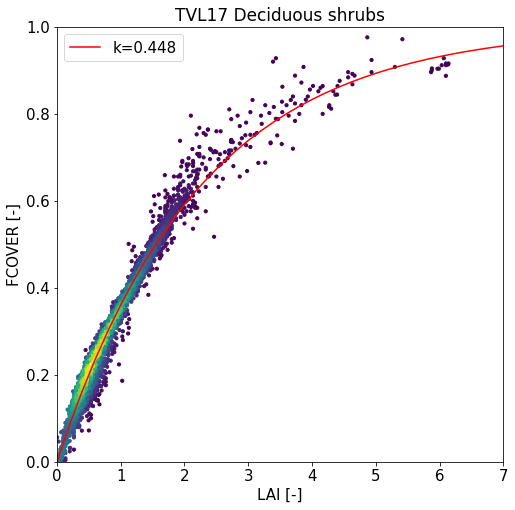

In [4]:
# RUN FITTING + PLOTS
for i in range(len(vt_l)):
    vt = vt_l[i]
    th = th_l[i]
    d = fitting_run(vt,th,year_start,year_end)
    
    x,y = d[0],d[1]
    x_fitted,y_fitted = d[2],d[3]
    pval,par = d[4],d[5]
    plotting(vt,th,x,y,x_fitted,y_fitted,pval,par,year_start,year_end)

               1       2       9       13      16      17      3       4   \
high/low      low     low     low     low     low     low    high    high   
#points    752850  751491  704860  750839  755354  754076  750598  755116   
threshold    0.90    0.90    0.90    0.75    0.70    0.70    0.85    0.75   
k           0.458   0.456   0.375   0.419   0.438   0.448   0.351   0.381   
p-val         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
rmse        0.036   0.026   0.018   0.049   0.044   0.026   0.038   0.033   

               5       6   
high/low     high    high  
#points    754350  754930  
threshold    0.70    0.90  
k           0.396    0.39  
p-val         0.0     0.0  
rmse        0.053   0.036  


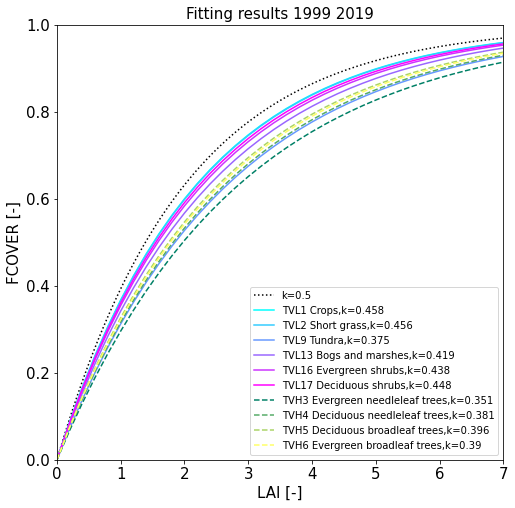

In [5]:
# run function to plot all fits in one figure
vt_l2 = [1,2,9,13,16,17,3,4,5,6] #change order to get high and low separated
th_l2 = ['0.90','0.90','0.90','0.75','0.70','0.70','0.85','0.75','0.70','0.90']

print(make_fitting_table(vt_l2, th_l2,year_start,year_end))
make_fitting_table(vt_l, th_l,year_start,year_end)
plot_all_fits(vt_l2, th_l2, year_start,year_end)

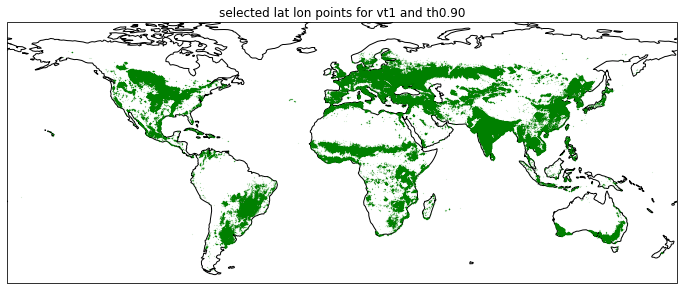

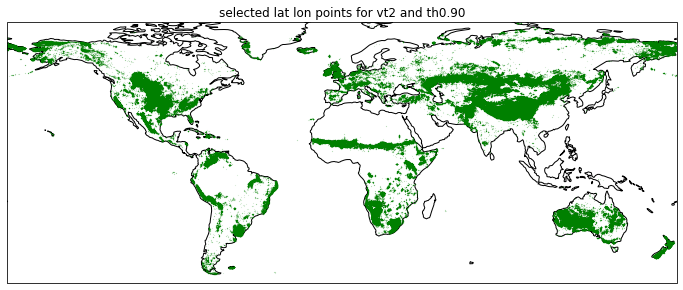

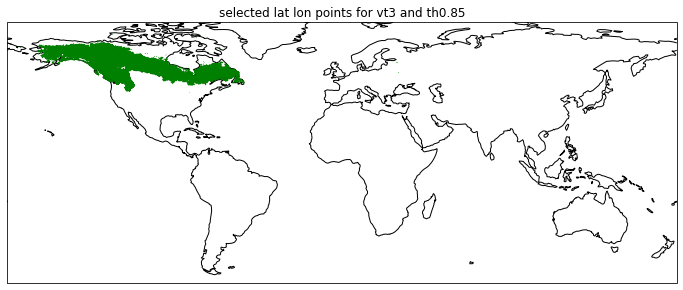

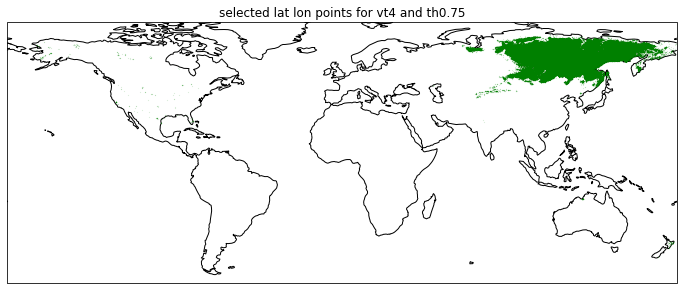

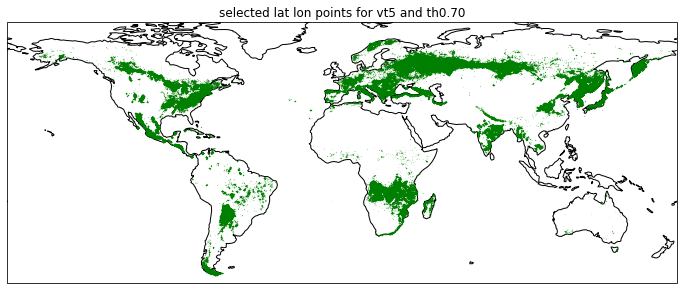

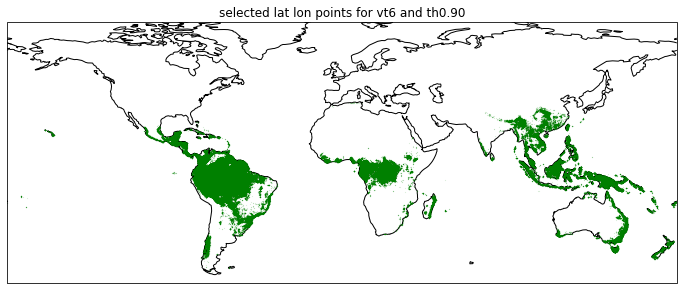

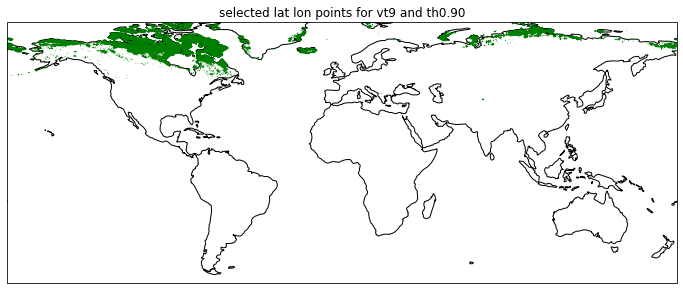

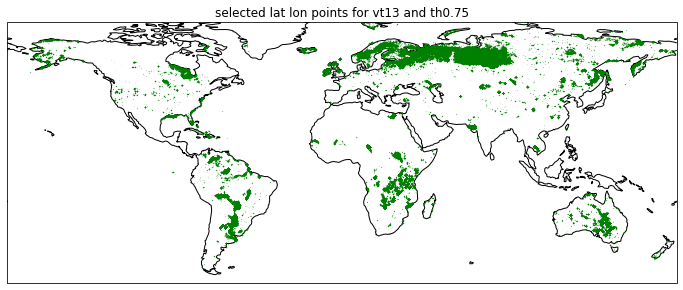

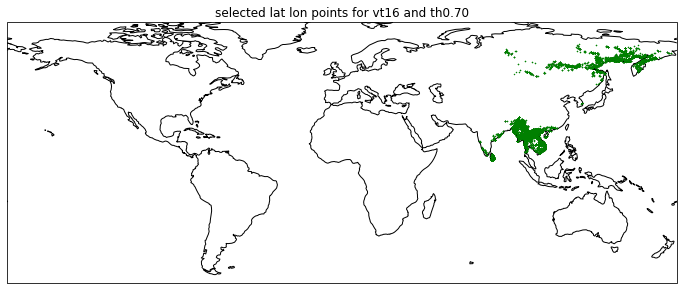

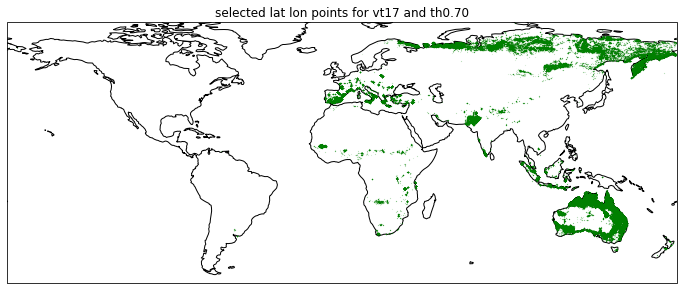

In [6]:
# visualize points
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

for i in range(len(vt_l)):
    lat = np.load(f'{fol}/output/all_years_arrays/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
    lon = np.load(f'{fol}/output/all_years_arrays/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.plot(lon,lat,'o',color='green', markersize=0.05)
    ax.set_xlim(-180,180)
    ax.set_ylim(-60,80)
    ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')
    fig.savefig(f'{fol}/output/figures/map_selectedpoints_{vt_l[i]}_{th_l[i]}_{year_start}_{year_end}.jpg',bbox_inches='tight')

There is some strange behaviour for evergreen vegetation with high LAI (6 and 16). Check where this occurs here below.
Conclusion --> in the tropics

Text(0.5, 1.0, '6')

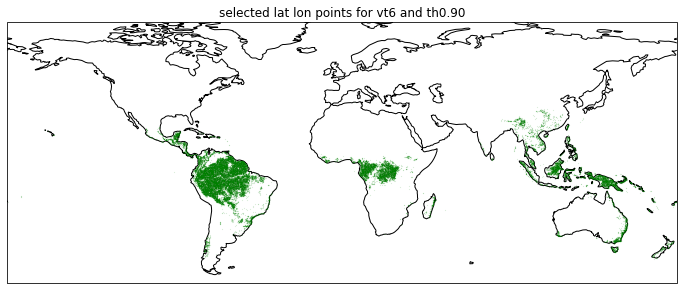

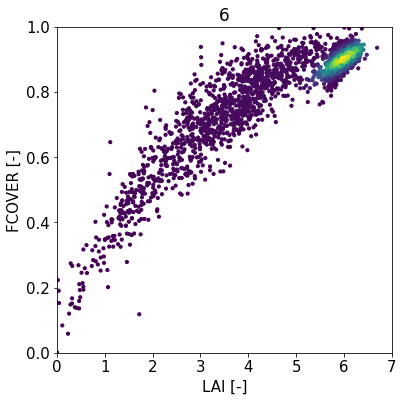

In [7]:
# vt6 strange points
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [2019]#,2001,2002,2003,2004]#,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015] #,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

i=5

x=np.load(f'{fol}/output/all_years_arrays/x_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
y=np.load(f'{fol}/output/all_years_arrays/y_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
lat=np.load(f'{fol}/output/all_years_arrays/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
lon=np.load(f'{fol}/output/all_years_arrays/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lon,lat,'o',color='green', markersize=0.05)
ax.set_xlim(-180,180)
ax.set_ylim(-60,80)
ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')

xdata,ydata = x,y
ar = np.arange(0,len(xdata),1)
idx = np.random.choice(ar,5000, replace=False)
xd = xdata[idx]
yd = ydata[idx]

# xd,yd = xdata,ydata
# calculate point density
xy = np.vstack([xd,yd])
z = gaussian_kde(xy)(xy)

# plot observations and fitted line
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(xd,yd,c=z,s=10)
ax.set_xlim(0,7)
ax.set_ylim(0,1)
ax.tick_params(labelsize=15)
ax.set_xlabel('LAI [-]',size=15)
ax.set_ylabel('FCOVER [-]',size=15)
ax.set_title(f'{vt_l[i]}', fontsize=17)

Text(0.5, 1.0, 'selected lat lon points for vt6 and th0.90')

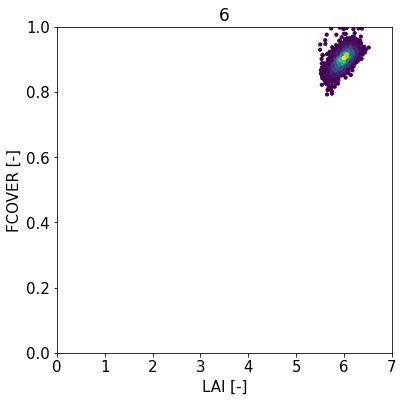

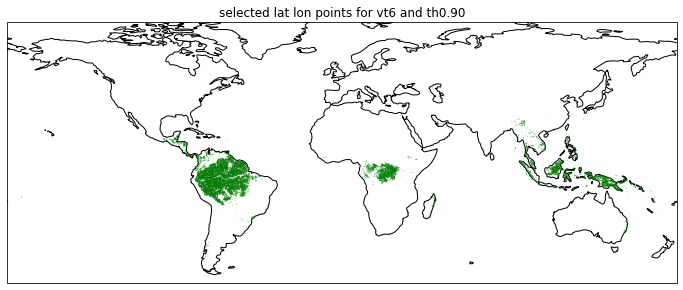

In [8]:
# PLOT ONLY POINTS WITH LAI>5.5
ind=np.where(x>5.5)

xdata,ydata = x[ind],y[ind]
ar = np.arange(0,len(xdata),1)
idx = np.random.choice(ar,5000, replace=False)
xd = xdata[idx]
yd = ydata[idx]

# xd,yd = xdata,ydata
# calculate point density
xy = np.vstack([xd,yd])
z = gaussian_kde(xy)(xy)

# plot observations and fitted line
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(xd,yd,c=z,s=10)
ax.set_xlim(0,7)
ax.set_ylim(0,1)
ax.tick_params(labelsize=15)
ax.set_xlabel('LAI [-]',size=15)
ax.set_ylabel('FCOVER [-]',size=15)
ax.set_title(f'{vt_l[i]}', fontsize=17)

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lon[ind],lat[ind],'o',color='green', markersize=0.05)
ax.set_xlim(-180,180)
ax.set_ylim(-60,80)
ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')

Text(0.5, 1.0, '16')

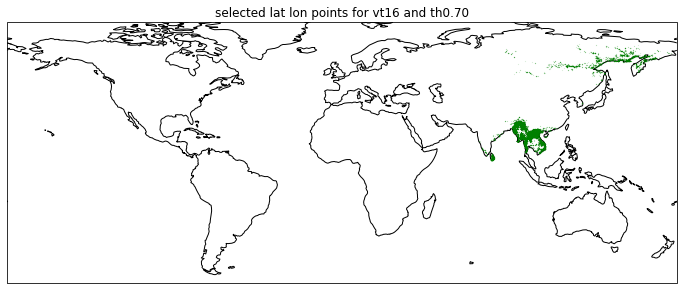

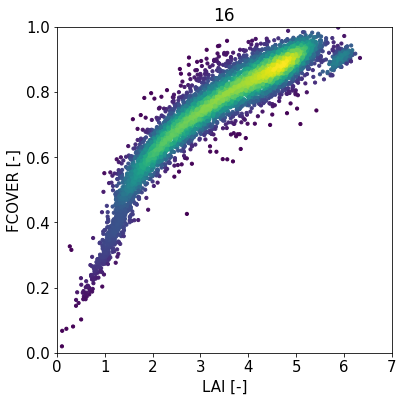

In [9]:
# vt6 strange points
fol='/home/vanoorschot/work/fransje/scripts/LAI_FCOVER/fittings/fitting_1km/final'
year_l = [2019]#,2001,2002,2003,2004]#,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015] #,2016,2017,2018,2019]
vt_l = [1,2,3,4,5,6,9,13,16,17] #1
th_l = ['0.90','0.90','0.85','0.75','0.70','0.90','0.90','0.75','0.70','0.70'] #0.90
year_start = year_l[0]
year_end = year_l[-1]

i=8

x=np.load(f'{fol}/output/all_years_arrays/x_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
y=np.load(f'{fol}/output/all_years_arrays/y_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
lat=np.load(f'{fol}/output/all_years_arrays/lat_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')
lon=np.load(f'{fol}/output/all_years_arrays/lon_{year_start}_{year_end}_{vt_l[i]}_{th_l[i]}.npy')

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lon,lat,'o',color='green', markersize=0.05)
ax.set_xlim(-180,180)
ax.set_ylim(-60,80)
ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')

xdata,ydata = x,y
ar = np.arange(0,len(xdata),1)
idx = np.random.choice(ar,5000, replace=False)
xd = xdata[idx]
yd = ydata[idx]

# xd,yd = xdata,ydata
# calculate point density
xy = np.vstack([xd,yd])
z = gaussian_kde(xy)(xy)

# plot observations and fitted line
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(xd,yd,c=z,s=10)
ax.set_xlim(0,7)
ax.set_ylim(0,1)
ax.tick_params(labelsize=15)
ax.set_xlabel('LAI [-]',size=15)
ax.set_ylabel('FCOVER [-]',size=15)
ax.set_title(f'{vt_l[i]}', fontsize=17)

Text(0.5, 1.0, 'selected lat lon points for vt16 and th0.70')

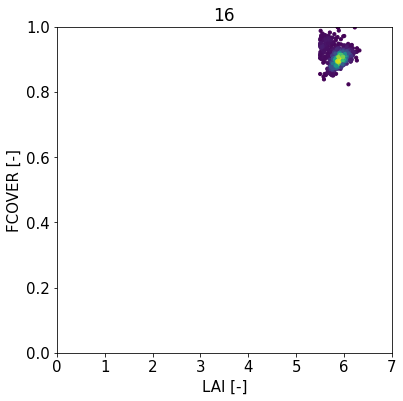

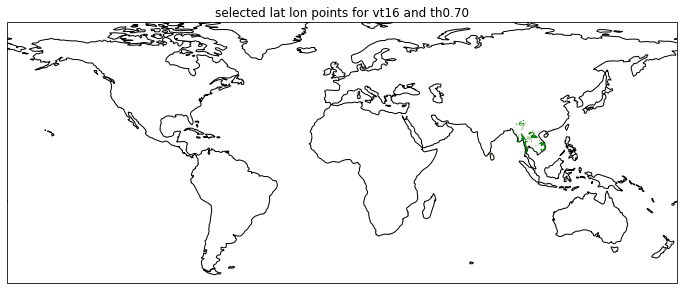

In [10]:
# PLOT ONLY POINTS WITH LAI>5.5
ind=np.where(x>5.5)

xdata,ydata = x[ind],y[ind]
ar = np.arange(0,len(xdata),1)
idx = np.random.choice(ar,1000, replace=False)
xd = xdata[idx]
yd = ydata[idx]

# xd,yd = xdata,ydata
# calculate point density
xy = np.vstack([xd,yd])
z = gaussian_kde(xy)(xy)

# plot observations and fitted line
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(xd,yd,c=z,s=10)
ax.set_xlim(0,7)
ax.set_ylim(0,1)
ax.tick_params(labelsize=15)
ax.set_xlabel('LAI [-]',size=15)
ax.set_ylabel('FCOVER [-]',size=15)
ax.set_title(f'{vt_l[i]}', fontsize=17)

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lon[ind],lat[ind],'o',color='green', markersize=0.05)
ax.set_xlim(-180,180)
ax.set_ylim(-60,80)
ax.set_title(f'selected lat lon points for vt{vt_l[i]} and th{th_l[i]}')